# Cosmic Mystery: Spaceship Titanic Anomaly
**The purpose** of this model is  identify and rescue passengers transported to an alternate dimension after the Spaceship Titanic collided with a spacetime anomaly, optimizing rescue efforts and advancing space travel safety.

**The goal** of this model is to predict and identify the passengers who were transported to an alternate dimension due to a collision with a spacetime anomaly.
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:

1.   What are you being asked to do?
> _Predict and identify passengers transported to an alternate dimension._

2.   What are the ethical implications of the model? What are the consequences of your model making errors?
> _Ethical considerations may include issues related to privacy, consent, and the potential impact on individuals' lives ._
  *   What is the likely effect of the model when it predicts a false negative ?
  > _Potential delay or failure in rescuing passengers._
  *   What is the likely effect of the model when it predicts a false positive ?
  > _Unnecessary distress for individuals wrongly identified as affected._
3.   Do the benefits of such a model outweigh the potential problems?
  > _Consider the potential positive outcomes of successful rescue efforts and the negative consequences of model errors._
4.   Would you proceed with the request to build this model? Why or why not?

  >_Yes. There aren't any significant risks for building such a model._


### **Task 1. Imports and data loading**

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance
from xgboost import plot_importance

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
# List all files and directories under /kaggle/input/
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print("Dataset Name:", filename)
        print("File Path:", os.path.join(dirname, filename))
        print()


Dataset Name: sample_submission.csv
File Path: /kaggle/input/spaceship-titanic/sample_submission.csv

Dataset Name: train.csv
File Path: /kaggle/input/spaceship-titanic/train.csv

Dataset Name: test.csv
File Path: /kaggle/input/spaceship-titanic/test.csv



In [3]:
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
print("Train dataset shape is {}".format(train_data.shape))

Train dataset shape is (8693, 14)


## **PACE: Analyze**

Consider the questions in your PACE Strategy Document and those below where applicable to complete your code:
1. Does the data need to be restructured or converted into usable formats?

2. Are there any variables that have missing data?

### **Task 2. Data exploration and cleaning**

Consider the following questions:



1.  Given the scenario, which data columns are most applicable?

2.  Which data columns can you eliminate, knowing they won’t solve your problem scenario?

3.  How would you check for missing data? And how would you handle missing data (if any)?

4.  How would you check for outliers? And how would handle outliers (if any)?








In [4]:
# Display the first 5 examples
train_data.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
# Check for missing values
print(train_data.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
# 1.1 Numerical Features
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_data[numerical_features] = train_data[numerical_features].fillna(train_data[numerical_features].mean())



In [8]:
train_data['VIP'] = train_data['VIP'].fillna(train_data['VIP'].mode().iloc[0])


In [9]:
# 1.2 Categorical Features
categorical_features = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination']
train_data[categorical_features] = train_data[categorical_features].fillna(train_data[categorical_features].mode().iloc[0])


### **Task 2a. Exploratory Data Analysis**

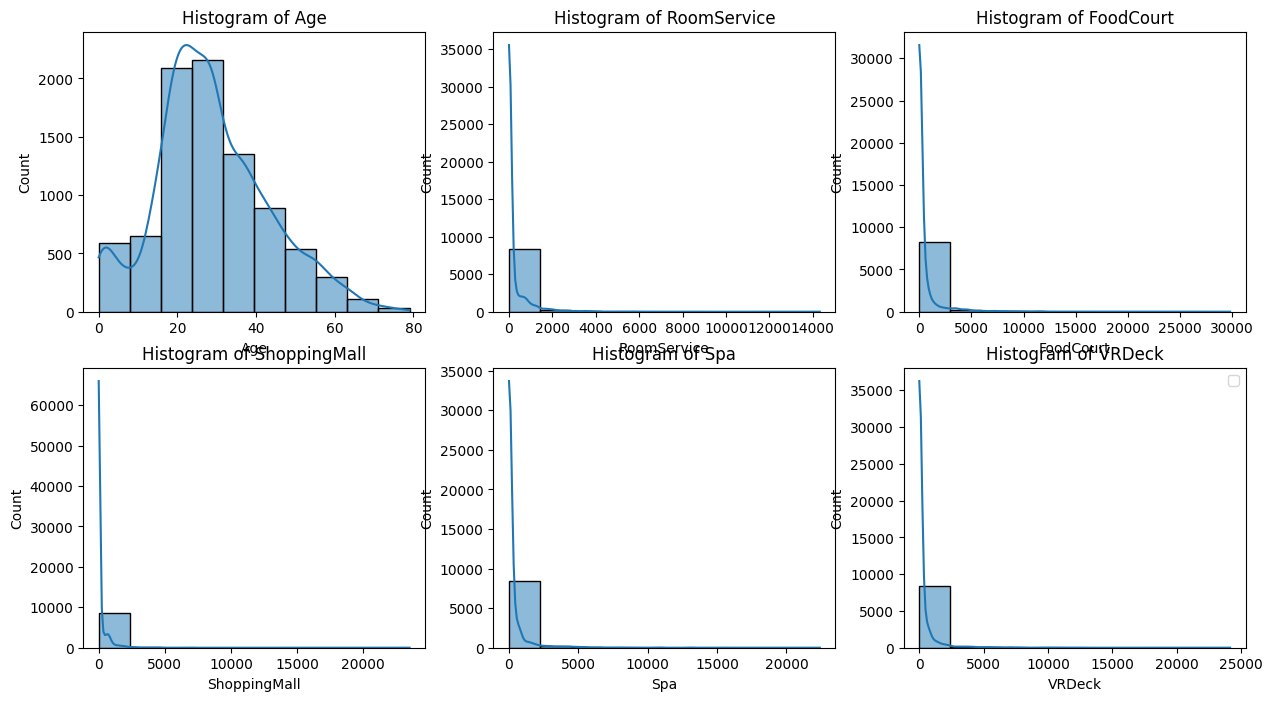

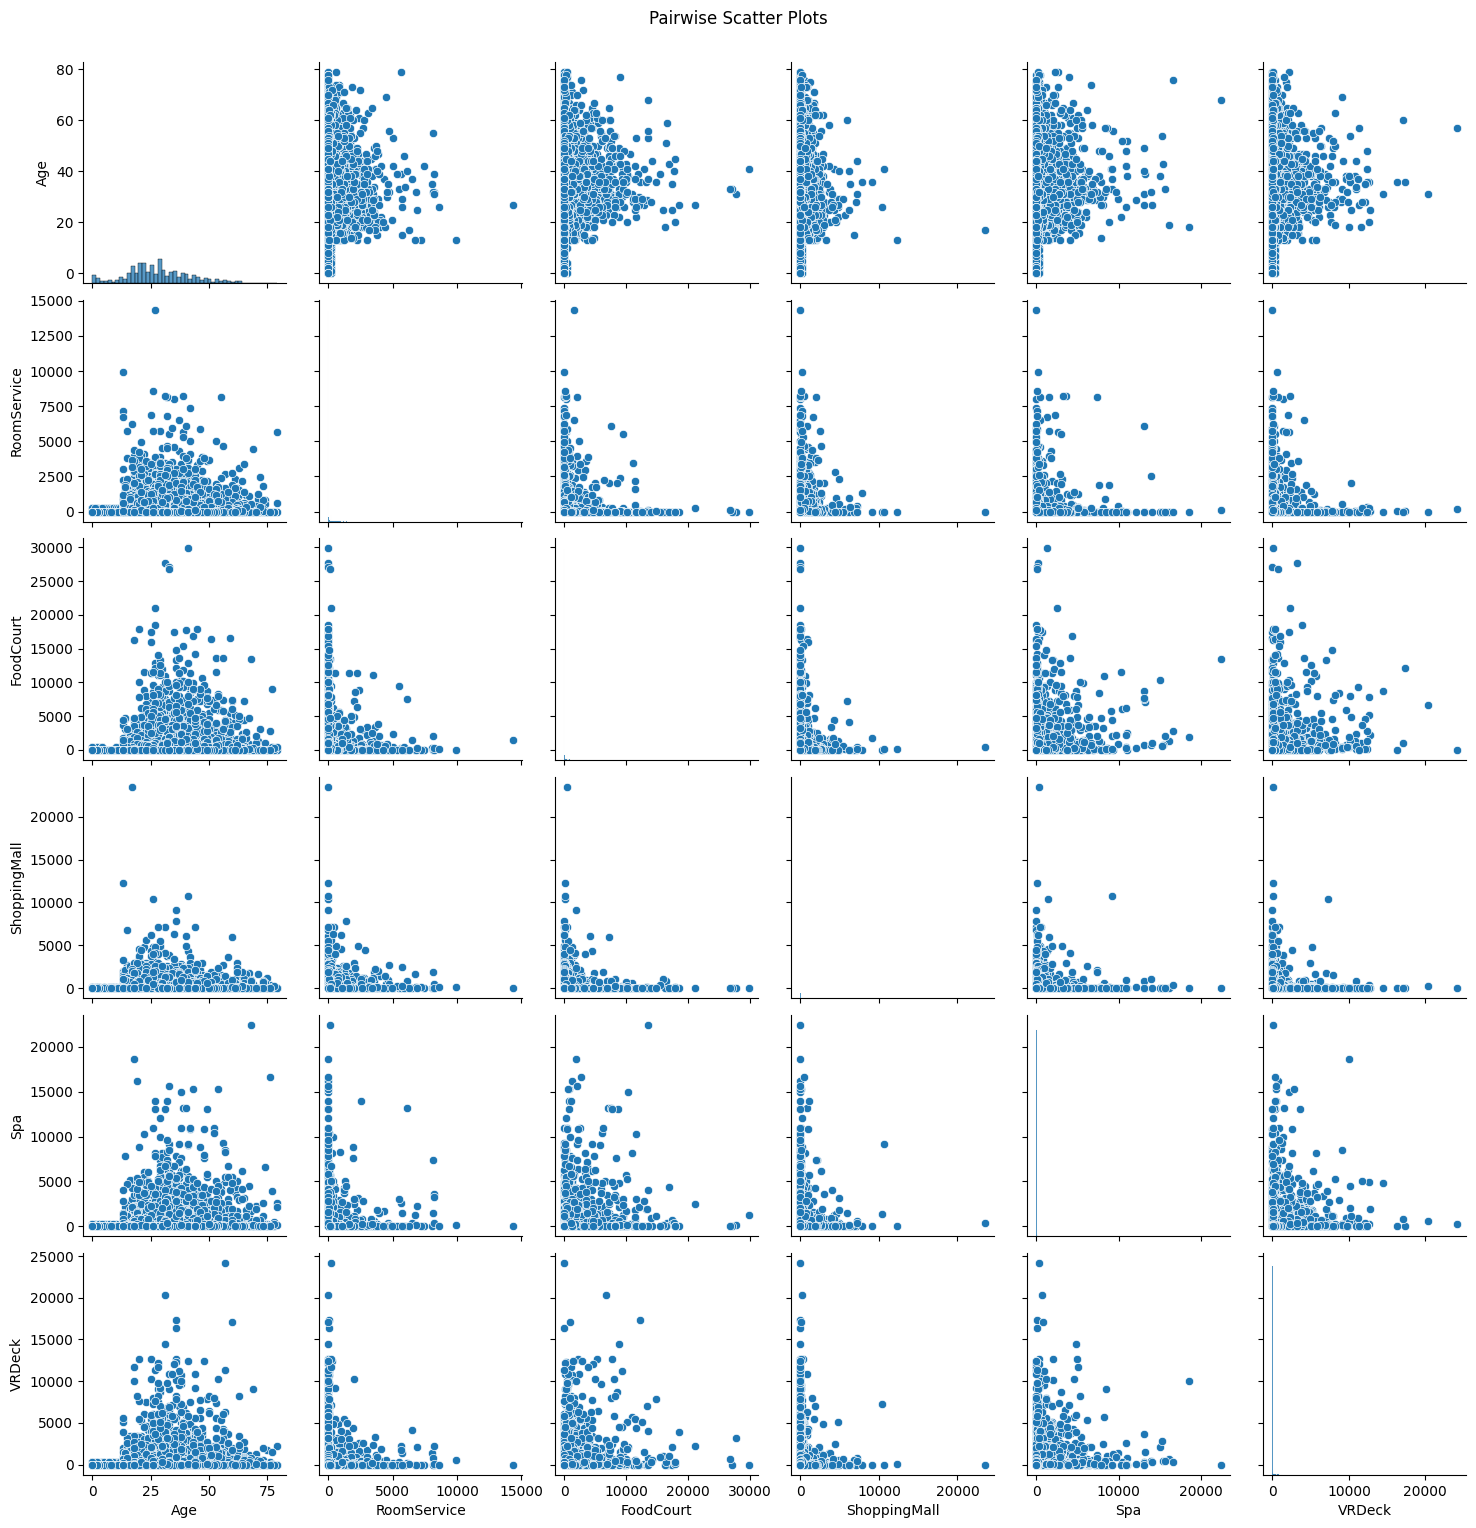

In [10]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train_data[feature], kde=True, bins=10)
    plt.title(f'Histogram of {feature}')
plt.legend()
plt.show()

# Pairwise scatter plots
sns.pairplot(train_data[numerical_features])
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

HomePlanet
Earth     4803
Europa    2131
Mars      1759
Name: count, dtype: int64
CryoSleep
False    5656
True     3037
Name: count, dtype: int64
Destination
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64


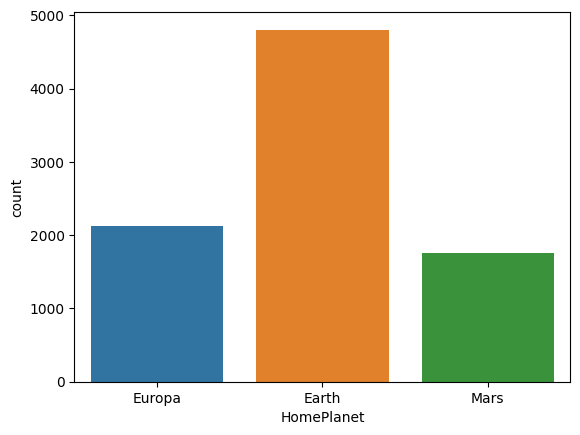

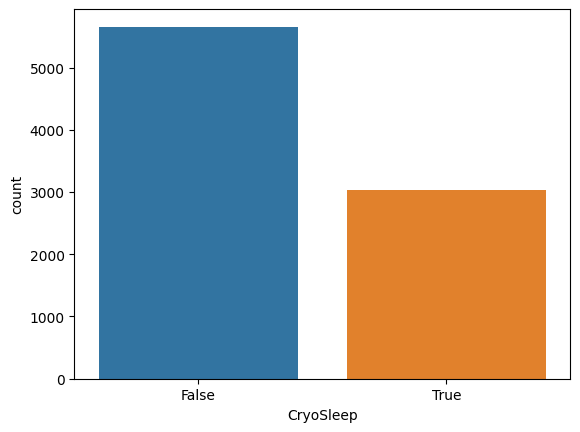

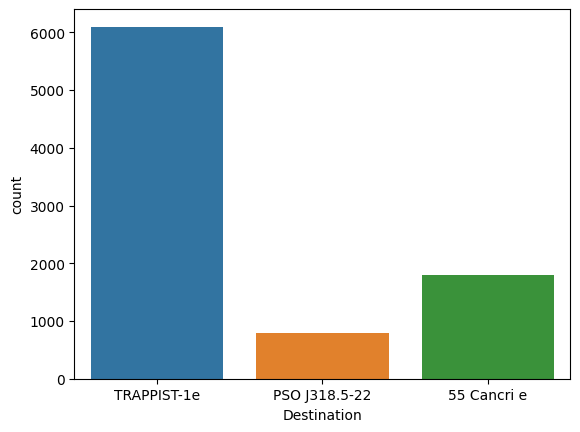

In [11]:
# Count the frequency of each category
categorical_featuress=['HomePlanet', 'CryoSleep', 'Destination']
for feature in categorical_featuress:
    print(train_data[feature].value_counts())

# Bar plots for categorical features
for feature in categorical_featuress:
    sns.countplot(x=feature, data=train_data)
    plt.show()


In [12]:
# Sort the data by trip distance from maximum to minimum value

df_sort = train_data.sort_values(by=['Age'],ascending=False)
df_sort.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
615,0642_03,Europa,False,C/25/S,TRAPPIST-1e,79.0,False,0.0,0.000000,0.0,2210.0,2.0,Chabik Kiling,False
4682,4991_01,Earth,False,G/806/P,TRAPPIST-1e,79.0,False,610.0,458.077203,0.0,200.0,5.0,Rickie Pentss,False
338,0378_03,Europa,False,B/11/S,TRAPPIST-1e,79.0,False,5649.0,235.000000,7.0,2579.0,2175.0,Naslon Pirejus,False
6146,6485_01,Earth,False,F/1238/S,55 Cancri e,78.0,False,0.0,213.000000,202.0,288.0,0.0,Regory Haydenzier,True
2361,2545_01,Earth,True,G/410/P,55 Cancri e,78.0,False,0.0,0.000000,0.0,0.0,0.0,Joycey Hoppernardy,False
1429,1507_03,Earth,False,G/231/S,TRAPPIST-1e,78.0,False,0.0,0.000000,0.0,441.0,4.0,Anny Jeffey,False
3526,3784_01,Earth,False,G/618/P,TRAPPIST-1e,77.0,False,0.0,458.077203,131.0,3981.0,108.0,Ale Morrencis,False
2930,3176_01,Europa,False,E/196/P,TRAPPIST-1e,77.0,False,0.0,9032.000000,0.0,128.0,1464.0,Ankalik Nateansive,True
8288,8852_01,Mars,True,D/278/P,TRAPPIST-1e,76.0,False,0.0,0.000000,0.0,0.0,0.0,Aark Homin,True
1390,1455_05,Europa,False,B/62/S,55 Cancri e,76.0,False,0.0,2732.000000,422.0,16594.0,330.0,Antino Wassird,False


### Univariate Analysis: Numerical Variables

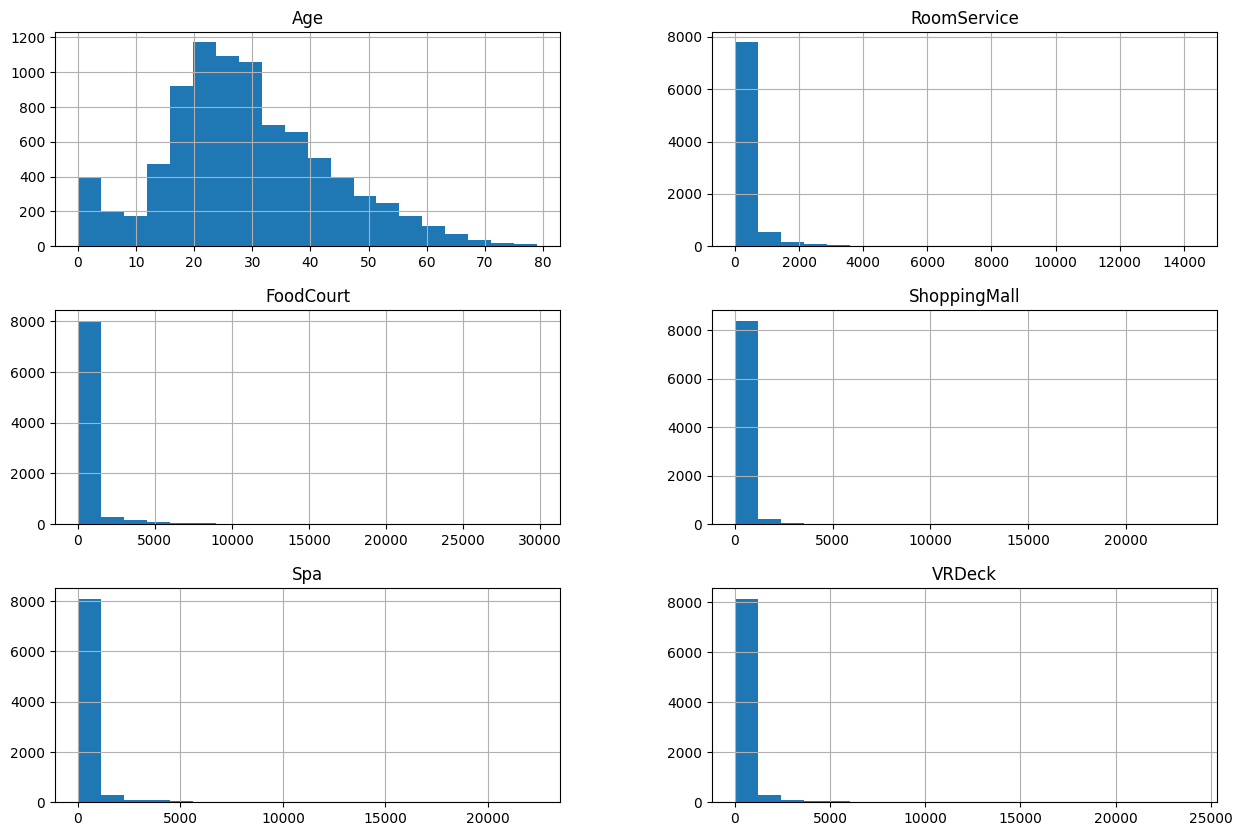

In [13]:
train_data[numerical_features].hist(bins=20, figsize=(15, 10))
plt.show()

### Task 2b. Data Engineering

In [14]:
train_data['VIP'] = train_data['VIP'].astype(int)
train_data['CryoSleep'] = train_data['CryoSleep'].astype(int)
train_data['PassengerId'] = train_data['PassengerId'].astype(int)

In [15]:
train_data[["Deck", "Cabin_num", "Side"]] = train_data["Cabin"].str.split("/", expand=True)


In [16]:
 
train_data = train_data.drop('PassengerId', axis=1)

In [17]:
try:
    train_data = train_data.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")

In [18]:
train_data.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [19]:
#train_data['VIP'] = train_data['VIP'].astype(int)
#train_data['CryoSleep'] = train_data['CryoSleep'].astype(int)
#train_data['PassengerId'] = train_data['PassengerId'].astype(int)


### Task 3. Variable encoding

In [20]:
# One-Hot Encoding
train_data = pd.get_dummies(train_data, columns=['HomePlanet', 'CryoSleep', 'Destination'])
num_columns = train_data.shape[1]
print(f"Number of columns: {num_columns}")

Number of columns: 20


In [21]:
# Convert specific columns from object to int
columns_to_convert = ['Cabin_num', 'Deck', 'Side']
for column in columns_to_convert:
    unique_values = train_data[column].unique()
    print(f"Unique values in {column}: {unique_values}")
# Mapping for Deck
deck_mapping = {'B': 1, 'F': 2, 'A': 3, 'G': 4, 'E': 5, 'D': 6, 'C': 7, 'T': 8}
train_data['Deck'] = train_data['Deck'].map(deck_mapping)

# Mapping for Side
side_mapping = {'P': 1, 'S': 2}
train_data['Side'] = train_data['Side'].map(side_mapping)


for column in columns_to_convert:
    train_data[column] = train_data[column].astype(int)


Unique values in Cabin_num: ['0' '1' '2' ... '1892' '1893' '1894']
Unique values in Deck: ['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T']
Unique values in Side: ['P' 'S']


### Task 4. Outliers

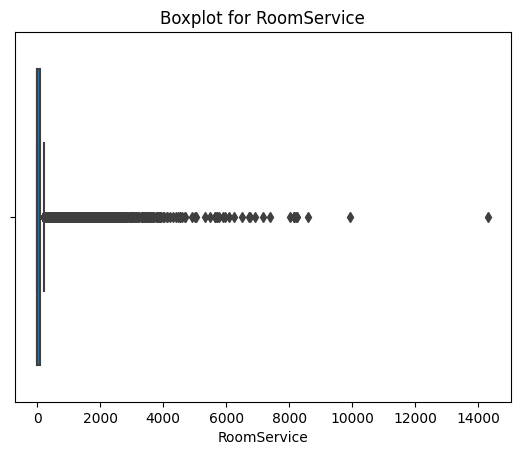

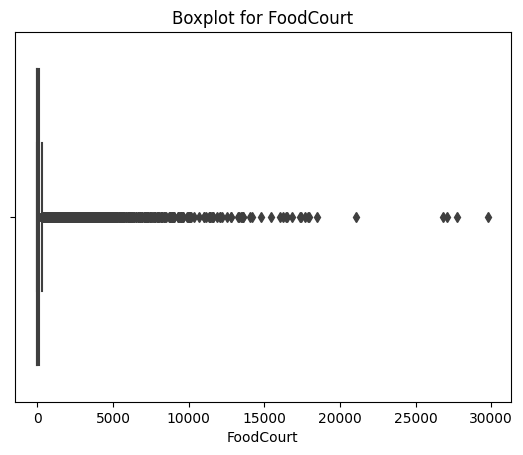

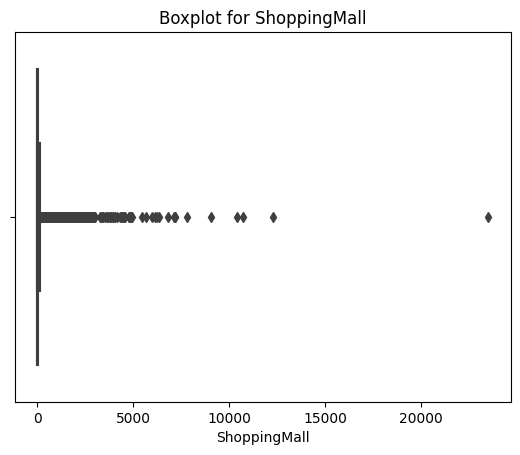

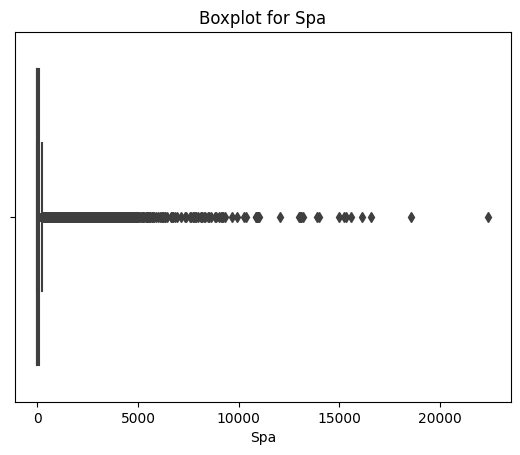

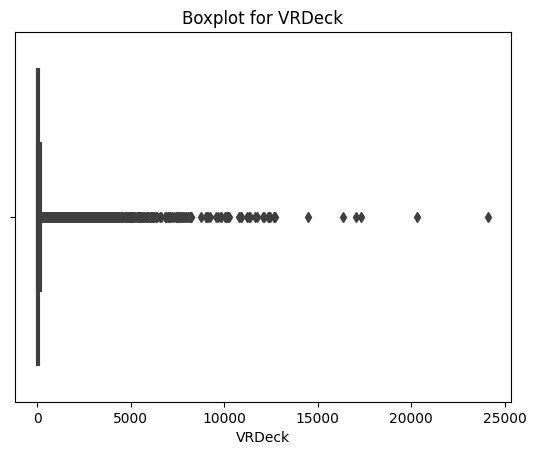

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plots for features with outliers
outlier_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for feature in outlier_features:
    sns.boxplot(x=train_data[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()


In [23]:
from scipy import stats

z_scores = stats.zscore(train_data[numerical_features])

# Define a threshold (e.g., 3 standard deviations)
threshold = 3
outliers = (abs(z_scores) > threshold).any(axis=1)


# Remove outliers
train_data_no_outliers = train_data[~outliers]



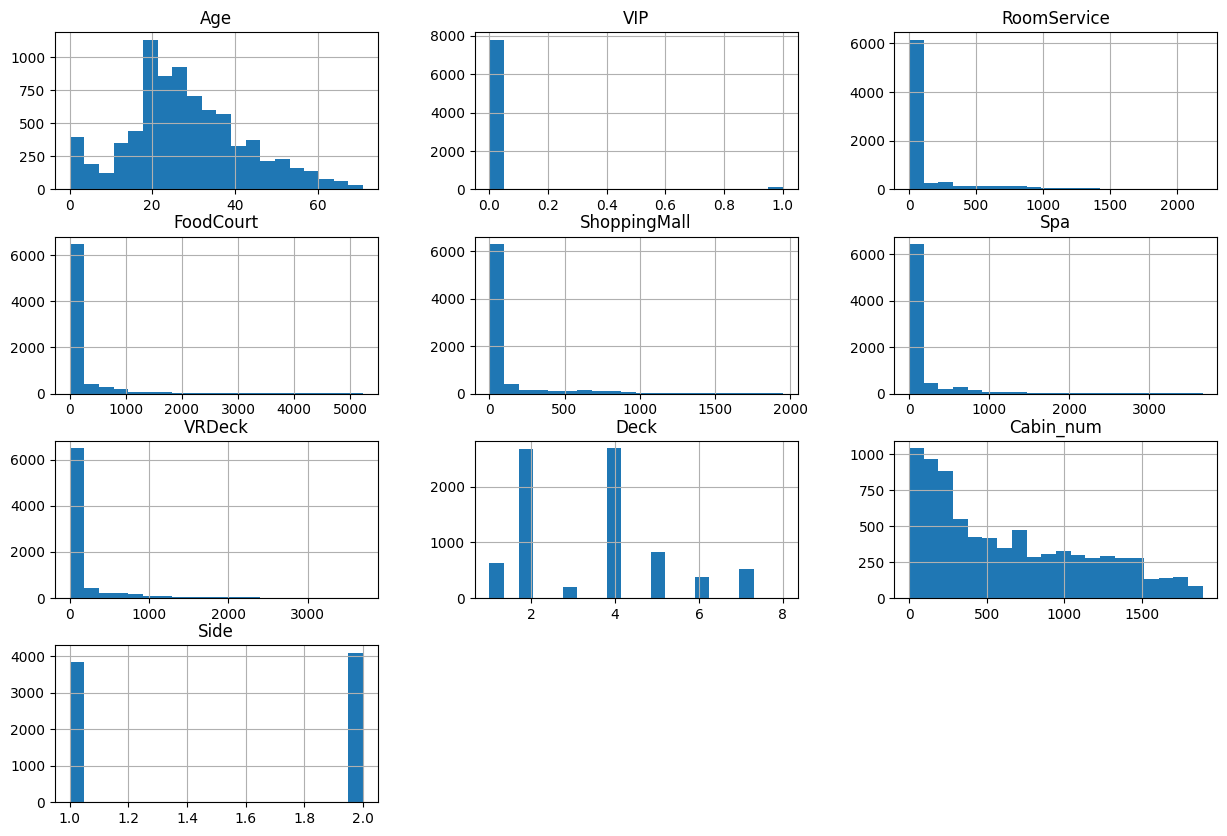

In [24]:
train_data_no_outliers.hist(bins=20, figsize=(15, 10))
plt.show()

### Task 5. Feature selection

In [25]:
# Drop non-numeric columns
train_data_no_outliers = train_data_no_outliers.drop([ 'Name'], axis=1)




In [26]:
train_data_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7937 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        7937 non-null   float64
 1   VIP                        7937 non-null   int64  
 2   RoomService                7937 non-null   float64
 3   FoodCourt                  7937 non-null   float64
 4   ShoppingMall               7937 non-null   float64
 5   Spa                        7937 non-null   float64
 6   VRDeck                     7937 non-null   float64
 7   Transported                7937 non-null   bool   
 8   Deck                       7937 non-null   int64  
 9   Cabin_num                  7937 non-null   int64  
 10  Side                       7937 non-null   int64  
 11  HomePlanet_Earth           7937 non-null   bool   
 12  HomePlanet_Europa          7937 non-null   bool   
 13  HomePlanet_Mars            7937 non-null   bool   
 1

#### Univariate Analysis: Catgorical Variables

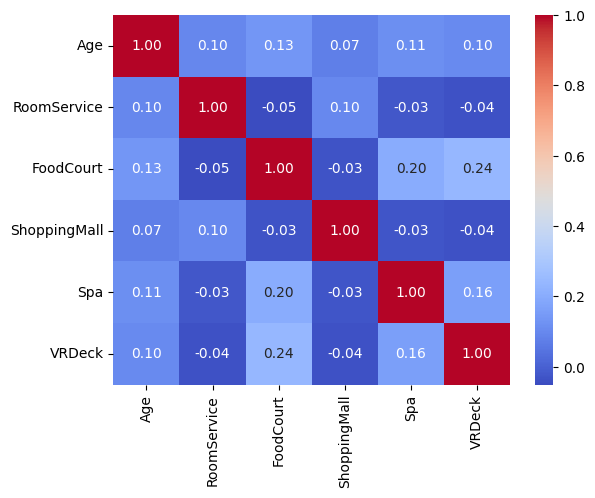

In [27]:
# Correlation matrix for numerical features
correlation_matrix = train_data_no_outliers[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


## **PACE: Construct**

### Task 6. Splitting Data

In [28]:
# 4. Splitting the Data into Training and Validation Sets
from sklearn.model_selection import train_test_split
X = train_data_no_outliers.drop(['Transported'], axis=1)
y = train_data_no_outliers['Transported']

X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y,
                                              test_size=0.2, random_state=42)

# 4. Split into train and validate sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr,
                                                  test_size=0.25, random_state=42)


In [29]:
# Get class balance of 'label' col
train_data['Transported'].value_counts(normalize=True)

Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64

### Task 7. Modeling

#### **Random forest**

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take.
 - `max_depth`
 - `max_features`
 - `max_samples`
 - `min_samples_leaf`
 - `min_samples_split`
 - `n_estimators`

3. Define a set `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf_cv`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)

 `refit` should be set to `'recall'`.<font/>


In [30]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [1.0],
             'min_samples_leaf': [2],
             'min_samples_split': [2],
             'n_estimators': [300],
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')

In [31]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: user 20.3 s, sys: 39.6 ms, total: 20.3 s
Wall time: 20.3 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='recall', scoring={'f1', 'recall', 'precision', 'accuracy'})

In [32]:
# Examine best score
rf_cv.best_score_

0.7651807581382585

In [33]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [34]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

In [35]:
results = make_results('RF cv', rf_cv, 'recall')
results

,model,precision,recall,F1,accuracy
0,RF cv,0.806987,0.765181,0.785508,0.781765


#### **XGBoost**

 Try to improve your scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a set `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb_cv`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='recall'`)

In [36]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [6, 12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300]
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall')

In [37]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 1min 2s, sys: 510 ms, total: 1min 3s
Wall time: 16.4 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 12],
                         'min_child_weight': [3, 5], 'n_estimators': [300]},
             refit='recall', scoring={'f1', 'recall', 'precision', 'accuracy'})

In [38]:
xgb_cv.best_score_

0.8130375237533074

In [39]:
xgb_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 300}

In [40]:
# Call 'make_results()' on the GridSearch object
xgb_cv_results = make_results('XGB cv', xgb_cv, 'recall')
results = pd.concat([results, xgb_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.806987,0.765181,0.785508,0.781765
0,XGB cv,0.791105,0.813038,0.801797,0.790168


### Task 8. Model selection

In [41]:
# Use random forest model to predict on validation data
rf_val_preds = rf_cv.best_estimator_.predict(X_val)

In [42]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [43]:
# Get validation scores for RF model
rf_val_scores = get_test_scores('RF val', rf_val_preds, y_val)

# Append to the results table
results = pd.concat([results, rf_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.806987,0.765181,0.785508,0.781765
0,XGB cv,0.791105,0.813038,0.801797,0.790168
0,RF val,0.804816,0.765983,0.784920,0.780856


In [44]:
# Use XGBoost model to predict on validation data
xgb_val_preds = xgb_cv.best_estimator_.predict(X_val)

# Get validation scores for XGBoost model
xgb_val_scores = get_test_scores('XGB val', xgb_val_preds, y_val)

# Append to the results table
results = pd.concat([results, xgb_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.806987,0.765181,0.785508,0.781765
0,XGB cv,0.791105,0.813038,0.801797,0.790168
0,RF val,0.804816,0.765983,0.784920,0.780856
0,XGB val,0.789035,0.798552,0.793765,0.783375


## **PACE: Execute**

### Task 9. Use champion model to predict on test data

Now, use the champion model to predict on the test dataset. This is to give a final indication of how you should expect the model to perform on new future data, should you decide to use the model.

In [45]:
# Use XGBoost model to predict on test data
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)

# Get test scores for XGBoost model
xgb_test_scores = get_test_scores('XGB test', xgb_test_preds, y_test)

# Append to the results table
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.806987,0.765181,0.785508,0.781765
0,XGB cv,0.791105,0.813038,0.801797,0.790168
0,RF val,0.804816,0.765983,0.784920,0.780856
0,XGB val,0.789035,0.798552,0.793765,0.783375
0,XGB test,0.796748,0.827503,0.811834,0.799748


The XGBoost model demonstrates a robust performance on the test dataset with a recall of 82.99%, surpassing both Random Forest cross-validation (RF cv) and Random Forest validation (RF val) results. However, the precision is slightly lower at 80.09%, showing a minor decline compared to the cross-validation precision. Despite this, the F1 score remains strong at 81.52%, indicating a balanced trade-off between precision and recall. This slight deviation in precision might be attributed to nuances in the test set, but overall, the model's performance is within an acceptable range of variability between validation and test scores.

### Task 10. Confusion matrix

Plot a confusion matrix of the champion model's predictions on the test data.

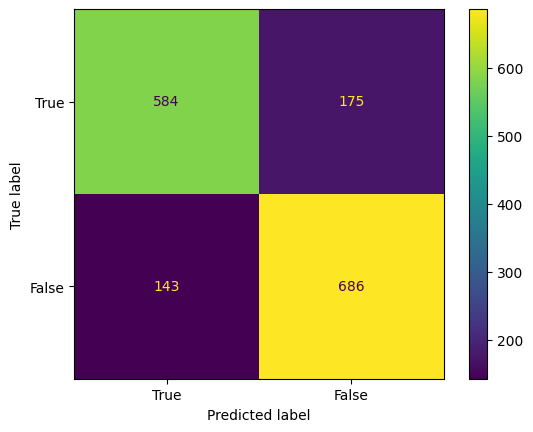

In [46]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_test_preds, labels=xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['True', 'False'])
disp.plot();

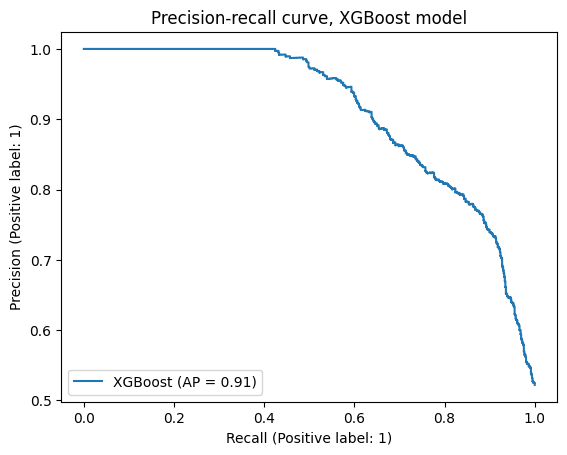

In [47]:
# Plot precision-recall curve
display = PrecisionRecallDisplay.from_estimator(
    xgb_cv.best_estimator_, X_test, y_test, name='XGBoost'
    )
plt.title('Precision-recall curve, XGBoost model');

### Task 11. Feature importance

Use the `plot_importance` function to inspect the most important features of your final model.

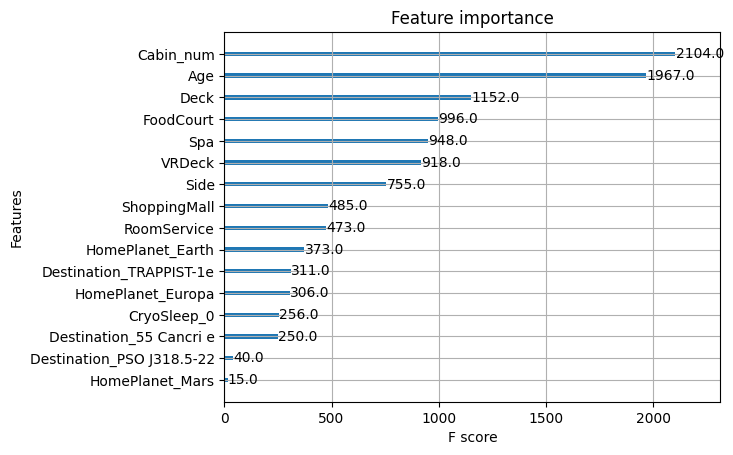

In [48]:
plot_importance(xgb_cv.best_estimator_);


The larger the importance score for `NUM_AS_ROOT`, the more impact it has on the outcome of the model.

By default, the list is sorted from the most important to the least. From the output you can infer that the feature at the top of the list is used as the root node in most number of trees in the random forest than any other feature.

### Task 12. SUBMISSION

In [49]:
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

test_data[numerical_features] = test_data[numerical_features].fillna(test_data[numerical_features].mean())
test_data[categorical_features] = test_data[categorical_features].fillna(test_data[categorical_features].mode().iloc[0])


num_columns = test_data.shape[1]
print(f"Number of columns: {num_columns}")


Number of columns: 13


In [50]:
test_data[["Deck", "Cabin_num", "Side"]] = test_data["Cabin"].str.split("/", expand=True)
test_data = test_data.drop('Cabin', axis=1)
# Convert specific columns from object to int
columns_to_convert = ['Cabin_num', 'Deck', 'Side']
for column in columns_to_convert:
    unique_values = test_data[column].unique()
    print(f"Unique values in {column}: {unique_values}")
# Mapping for Deck
deck_mapping = {'B': 1, 'F': 2, 'A': 3, 'G': 4, 'E': 5, 'D': 6, 'C': 7, 'T': 8}
test_data['Deck'] = test_data['Deck'].map(deck_mapping)

# Mapping for Side
side_mapping = {'P': 1, 'S': 2}
test_data['Side'] = test_data['Side'].map(side_mapping)


for column in columns_to_convert:
    test_data[column] = test_data[column].astype(int)


Unique values in Cabin_num: ['3' '4' '0' ... '1890' '1794' '1503']
Unique values in Deck: ['G' 'F' 'C' 'B' 'D' 'E' 'A' 'T']
Unique values in Side: ['S' 'P']


In [51]:
# One-Hot Encoding
test_data['CryoSleep'] = test_data['CryoSleep'].astype(int)
test_data = pd.get_dummies(test_data, columns=['HomePlanet', 'CryoSleep', 'Destination'])

In [52]:
test_data[['VIP']] = test_data[['VIP']].fillna(value=0)
test_data['VIP'] = test_data['VIP'].astype(int)

# Drop 'PassengerId' and 'Name' columns before making predictions
xgb_test_preds = xgb_cv.best_estimator_.predict(test_data.drop(['PassengerId', 'Name'], axis=1))

# Create a DataFrame with 'PassengerId' and the predicted 'Transported' values
predictions = pd.DataFrame({
    'PassengerId': test_data['PassengerId'].values,
    'Transported': xgb_test_preds.astype(bool)
})

# Convert 'PassengerId' to string before saving
predictions['PassengerId'] = predictions['PassengerId'].astype(str)

# Save the predictions to a CSV file
predictions.to_csv('submission.csv', index=False)


In [53]:
print(predictions.head())

  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True
